In [1]:
import matplotlib.pyplot as plt
import os
height = 10
width = height*0.6
plt.rcParams["figure.figsize"] = (height,width)
import numpy as np
plt.style.use('seaborn-colorblind')

target_directory = "../trained-models/ResNet18/300_epoch/"

try:
    os.mkdir(target_directory + 'figures/')
    print('Figure Folder Created..')
except FileExistsError:
    print('Figure Folder Exists..')

Figure Folder Exists..


In [20]:
parameter_counts = np.load(target_directory+"/metrics/parameter-counts-ResNet18.npy")
train_accuracies = np.load(target_directory+"/metrics/train-accuracy-ResNet18.npy")
val_accuracies = np.load(target_directory+"/metrics/val-accuracy-ResNet18.npy")
checkpoint_metrics = np.load(target_directory+"/metrics/checkpoint-metrics-ResNet18.npy")

num_runs = train_accuracies.shape[0]
num_layers = parameter_counts.shape[0]
num_epochs = train_accuracies.shape[1]
epochs = np.arange(0,num_epochs)

parameter_shape = (num_runs,num_layers,num_epochs)

std_gradients = np.zeros(parameter_shape)
mean_gradients = np.zeros(parameter_shape)
abs_mean_gradients = np.zeros(parameter_shape)

std_weights = np.zeros(parameter_shape)
mean_weights = np.zeros(parameter_shape)
abs_mean_weights = np.zeros(parameter_shape)

[[2.99000000e+02 9.41950142e-01 5.00000000e-03]
 [2.99000000e+02 9.41257894e-01 5.00000000e-03]
 [2.99000000e+02 9.41455722e-01 5.00000000e-03]]


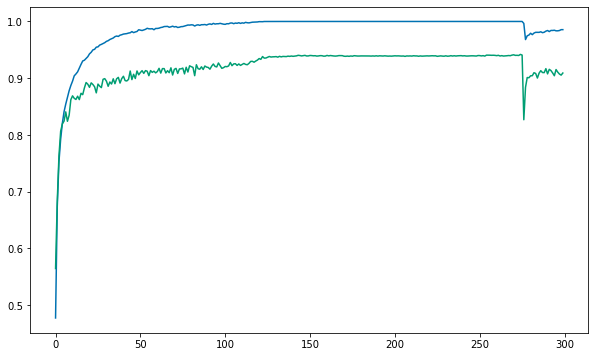

In [18]:
plt.plot(epochs,train_accuracies[0])
plt.plot(epochs,val_accuracies[0])

In [3]:
grad_dir = target_directory+"/gradient-values/"
for run in range(num_runs):
    run_dir = grad_dir + "/Run-" + str(run)+"/"
    
    std_gradients[run,:,:] = np.load(run_dir + "/std-gradients.npy").T
    mean_gradients[run,:,:] = np.load(run_dir + "/mean-gradients.npy").T
    abs_mean_gradients[run,:,:] = np.load(run_dir + "/abs-mean-gradients.npy").T

    std_weights[run,:,:] = np.load(run_dir + "/std-weights.npy").T
    mean_weights[run,:,:] = np.load(run_dir + "/mean-weights.npy").T
    abs_mean_weights[run,:,:] = np.load(run_dir + "/abs-mean-weights.npy").T

In [7]:
std_grad_run_mean = np.mean(std_gradients,axis=0)
mean_grad_run_mean = np.mean(mean_gradients,axis=0)
abs_mean_grad_run_mean = np.mean(abs_mean_gradients,axis=0)
std_weight_run_mean = np.mean(std_weights,axis=0)
mean_weight_run_mean = np.mean(mean_weights,axis=0)
abs_mean_weight_run_mean = np.mean(abs_mean_weights,axis=0)

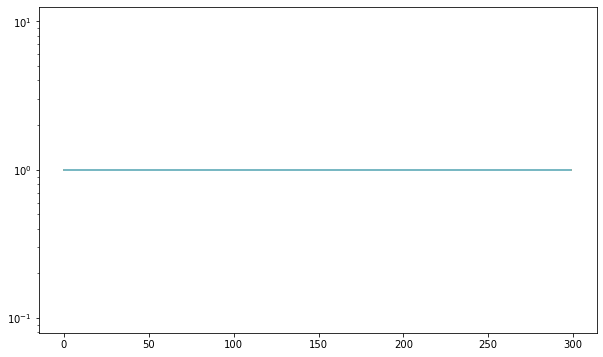

In [24]:
indices18 = [1,3,6,9,13,16]
for indice in indices18:
    plt.plot(epochs,np.abs(mean_grad_run_mean[indice,:])/np.abs(mean_weight_run_mean[indice,:]))
plt.yscale('log')

In [ ]:
plot_error(ResNet34mean,ResNet34std,"ResNet34",indices34)
# plot(DropoutResNet18,"ResNet18 with dropout")
plot_error(BranchedResNet34mean,BranchedResNet34std,"branched ResNet34",indices34)

In [ ]:
plot_error(ResNet50mean,ResNet50std,"ResNet50",indices50)
# # plot(DropoutResNet18,"ResNet18 with dropout")
plot_error(BranchedResNet50mean,BranchedResNet50std,"branched ResNet50",indices50)

In [ ]:
# plot(GoogLeNet,"GoogLeNet")